## Exercici 1

Classifica els diferents vols utilitzant l'algorisme de K-means.

## Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Configuracion para que se mestren todas las columnas
pd.set_option('display.max_columns', None)
# Configuracion para que los valores no se muestren con punto flotante
pd.options.display.float_format = '{:,.2f}'.format
# Lectura del fichero
df = pd.read_csv('DelayedFlights.csv')

# Normalizacion de los nombres de la columnas
df.columns = [col.lower() for col in df]

df.rename(columns={
    'dayofmonth': 'day_of_month', 
    'dayofweek': 'day_of_week',
    'crsdeptime': 'crs_dep_time',
    'crsarrtime': 'crs_arr_time',
    'uniquecarrier': 'unique_carrier',
    'actualelapsedtime': 'actual_elapsed_time',
    'crselapsedtime': 'crs_elapsed_time',
    'airtime': 'air_time',
    'arrdelay': 'arr_delay',
    'depdelay': 'dep_delay',
    'taxiout': 'taxi_out',
    'taxiin': 'taxi_in',
    'cancellationcode': 'cancellation_code',
    'carrierdelay': 'carrier_delay',
    'weatherdelay': 'weather_delay',
    'nasdelay': 'nas_delay',
    'securitydelay': 'security_delay',
    'lateaircraftdelay': 'late_air_craft_delay',
    'deptime': 'dep_time',
    'arrtime': 'arr_time',
    'tailnum': 'tail_num',
    'flightnum': 'flight_num'
    }, inplace=True)

# Eliminación de columnas
del df['tail_num']
del df['taxi_in']
del df['taxi_out']
del df['cancellation_code']
del df['year']

df.fillna({'arr_delay':0}, inplace=True)
df.fillna({'arr_time':0, 'crs_elapsed_time':0, 'carrier_delay':0, 'late_air_craft_delay':0, 'weather_delay':0, 'nas_delay':0, 'security_delay':0, 'actual_elapsed_time':0, 'air_time':0, 'cancelled':0}, inplace=True)

In [2]:
df.isnull().sum()

unnamed: 0              0
month                   0
day_of_month            0
day_of_week             0
dep_time                0
crs_dep_time            0
arr_time                0
crs_arr_time            0
unique_carrier          0
flight_num              0
actual_elapsed_time     0
crs_elapsed_time        0
air_time                0
arr_delay               0
dep_delay               0
origin                  0
dest                    0
distance                0
cancelled               0
diverted                0
carrier_delay           0
weather_delay           0
nas_delay               0
security_delay          0
late_air_craft_delay    0
dtype: int64

In [3]:
df.corr()

,unnamed: 0,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,flight_num,actual_elapsed_time,crs_elapsed_time,air_time,arr_delay,dep_delay,distance,cancelled,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_air_craft_delay
unnamed: 0,1.00,1.00,0.06,-0.00,-0.01,-0.01,0.00,0.00,-0.02,0.02,0.03,0.02,0.00,0.01,0.03,0.03,0.01,-0.00,0.00,0.01,-0.00,-0.00
month,1.00,1.00,0.06,0.00,-0.01,-0.01,0.00,0.00,-0.00,0.00,0.01,-0.00,-0.00,0.00,0.01,0.03,0.01,-0.00,0.00,0.00,-0.00,-0.00
day_of_month,0.06,0.06,1.00,0.02,0.00,0.00,0.00,0.00,-0.01,-0.00,0.00,-0.00,0.00,0.01,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.01
day_of_week,-0.00,0.00,0.02,1.00,0.02,0.03,0.01,0.02,-0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,-0.00,0.01,0.00,-0.01,0.00,0.01
dep_time,-0.01,-0.01,0.00,0.02,1.00,0.88,0.45,0.71,-0.02,-0.05,-0.04,-0.05,0.13,0.14,-0.06,0.00,-0.00,-0.01,0.02,0.05,-0.01,0.17
crs_dep_time,-0.01,-0.01,0.00,0.03,0.88,1.00,0.39,0.71,-0.05,-0.03,-0.03,-0.04,0.04,0.06,-0.03,0.00,-0.01,-0.07,-0.00,-0.01,-0.01,0.15
arr_time,0.00,0.00,0.00,0.01,0.45,0.39,1.00,0.61,-0.01,0.01,-0.01,-0.00,-0.04,-0.06,-0.03,-0.05,-0.16,-0.06,-0.02,0.03,-0.01,-0.02
crs_arr_time,0.00,0.00,0.00,0.02,0.71,0.71,0.61,1.00,-0.06,0.03,0.04,0.03,0.04,0.05,0.02,0.00,0.00,-0.06,0.00,0.02,-0.01,0.12
flight_num,-0.02,-0.00,-0.01,-0.01,-0.02,-0.05,-0.01,-0.06,1.00,-0.32,-0.34,-0.34,0.06,0.05,-0.36,0.01,-0.00,0.06,0.06,0.03,-0.00,-0.02
actual_elapsed_time,0.02,0.00,-0.00,0.00,-0.05,-0.03,0.01,0.03,-0.32,1.00,0.96,0.98,0.07,0.02,0.94,-0.03,-0.12,0.02,0.01,0.15,0.01,-0.01


In [4]:
df.shape

(1936758, 25)

Al ver que tenemos varias features y algunas estans correlacionadas, vamos a aplicar PCA para disminuir las dimensiones para luego aplicar el cluster

Como PCA es afectado por las escala, primero vamos a escalar los datos.

In [5]:
df = df.iloc[: , 1:]
del df['day_of_month']
del df['day_of_week']
del df['dep_time']
del df['unique_carrier']
del df['origin']
del df['dest']

In [6]:
# Escalamos los datos, ya que los algoritmos que utilizaremos se basan en la distancia.

scaler = StandardScaler()
scaler.fit(df)
scaled_ds = pd.DataFrame(scaler.transform(df),columns= df.columns)

Ahora que tenemos todo normalizado aplicaremos PCA

In [7]:
# Inicializamos PCA con 0.95 de explained variance, es decir para que tengan el 95% de la información.
pca = PCA(.95)
pca.fit(scaled_ds)

PCA(n_components=0.95)

In [8]:
pca.n_components_

12

In [9]:
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3","col4","col5","col6","col7","col8","col9","col10","col11","col12"]))

Hemos pasado de 25 a 12 features.

In [10]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 500,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
silhouette_coefficients = []

for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(PCA_ds)
    sse.append(kmeans.inertia_)

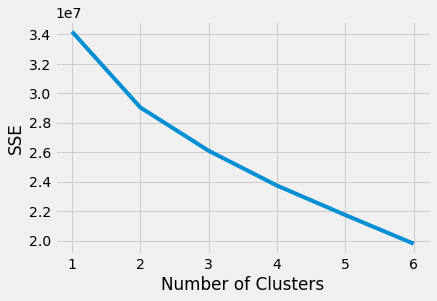

In [11]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 7), sse)
 plt.xticks(range(1, 7))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

Podemos ver aqui que el número optimo de clusters es 3.

Veamos que valor nos arroja el coeficiente silhouette

In [12]:
silhouette_coefficients = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(PCA_ds)
    # Le he puesto un sample_size de 100 porque si no nunca terminaba de ejecutarse
    score = silhouette_score(PCA_ds, kmeans.labels_, sample_size=100)
    silhouette_coefficients.append(score)

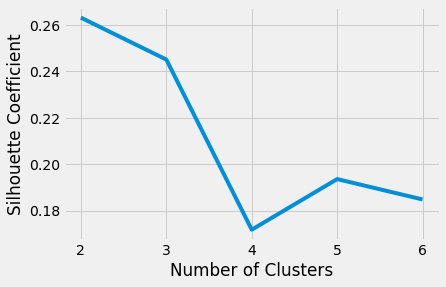

In [13]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

El punto máximo es en 3 también, por lo que separar la información en 3 clusteres sería correcto.

Pero vemos que el valor 0.325 de silhouette es un poco bajo, por lo que indica que los datos no están tan juntos dentro del cluster o no muy alejados de otros clusters.
Veamos que pasa si reduciremos la cantidad de componentes del PCA

In [14]:
pca = PCA(n_components=2)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))

silhouette_coefficients = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(PCA_ds)
    score = silhouette_score(PCA_ds, kmeans.labels_, sample_size=100)
    silhouette_coefficients.append(score)

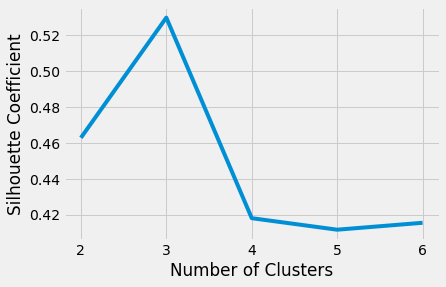

In [15]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [16]:
sse = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(PCA_ds)
    sse.append(kmeans.inertia_)

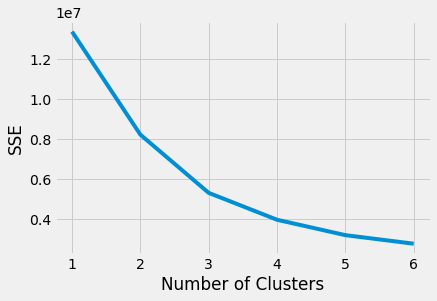

In [17]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 7), sse)
 plt.xticks(range(1, 7))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

Con estas modificaciones en la cantidad de componentes de PCA la cantidad de clusters siguien siendo 3, y con un mejor valor de Silhouette

## Exercici 2

Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

## Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

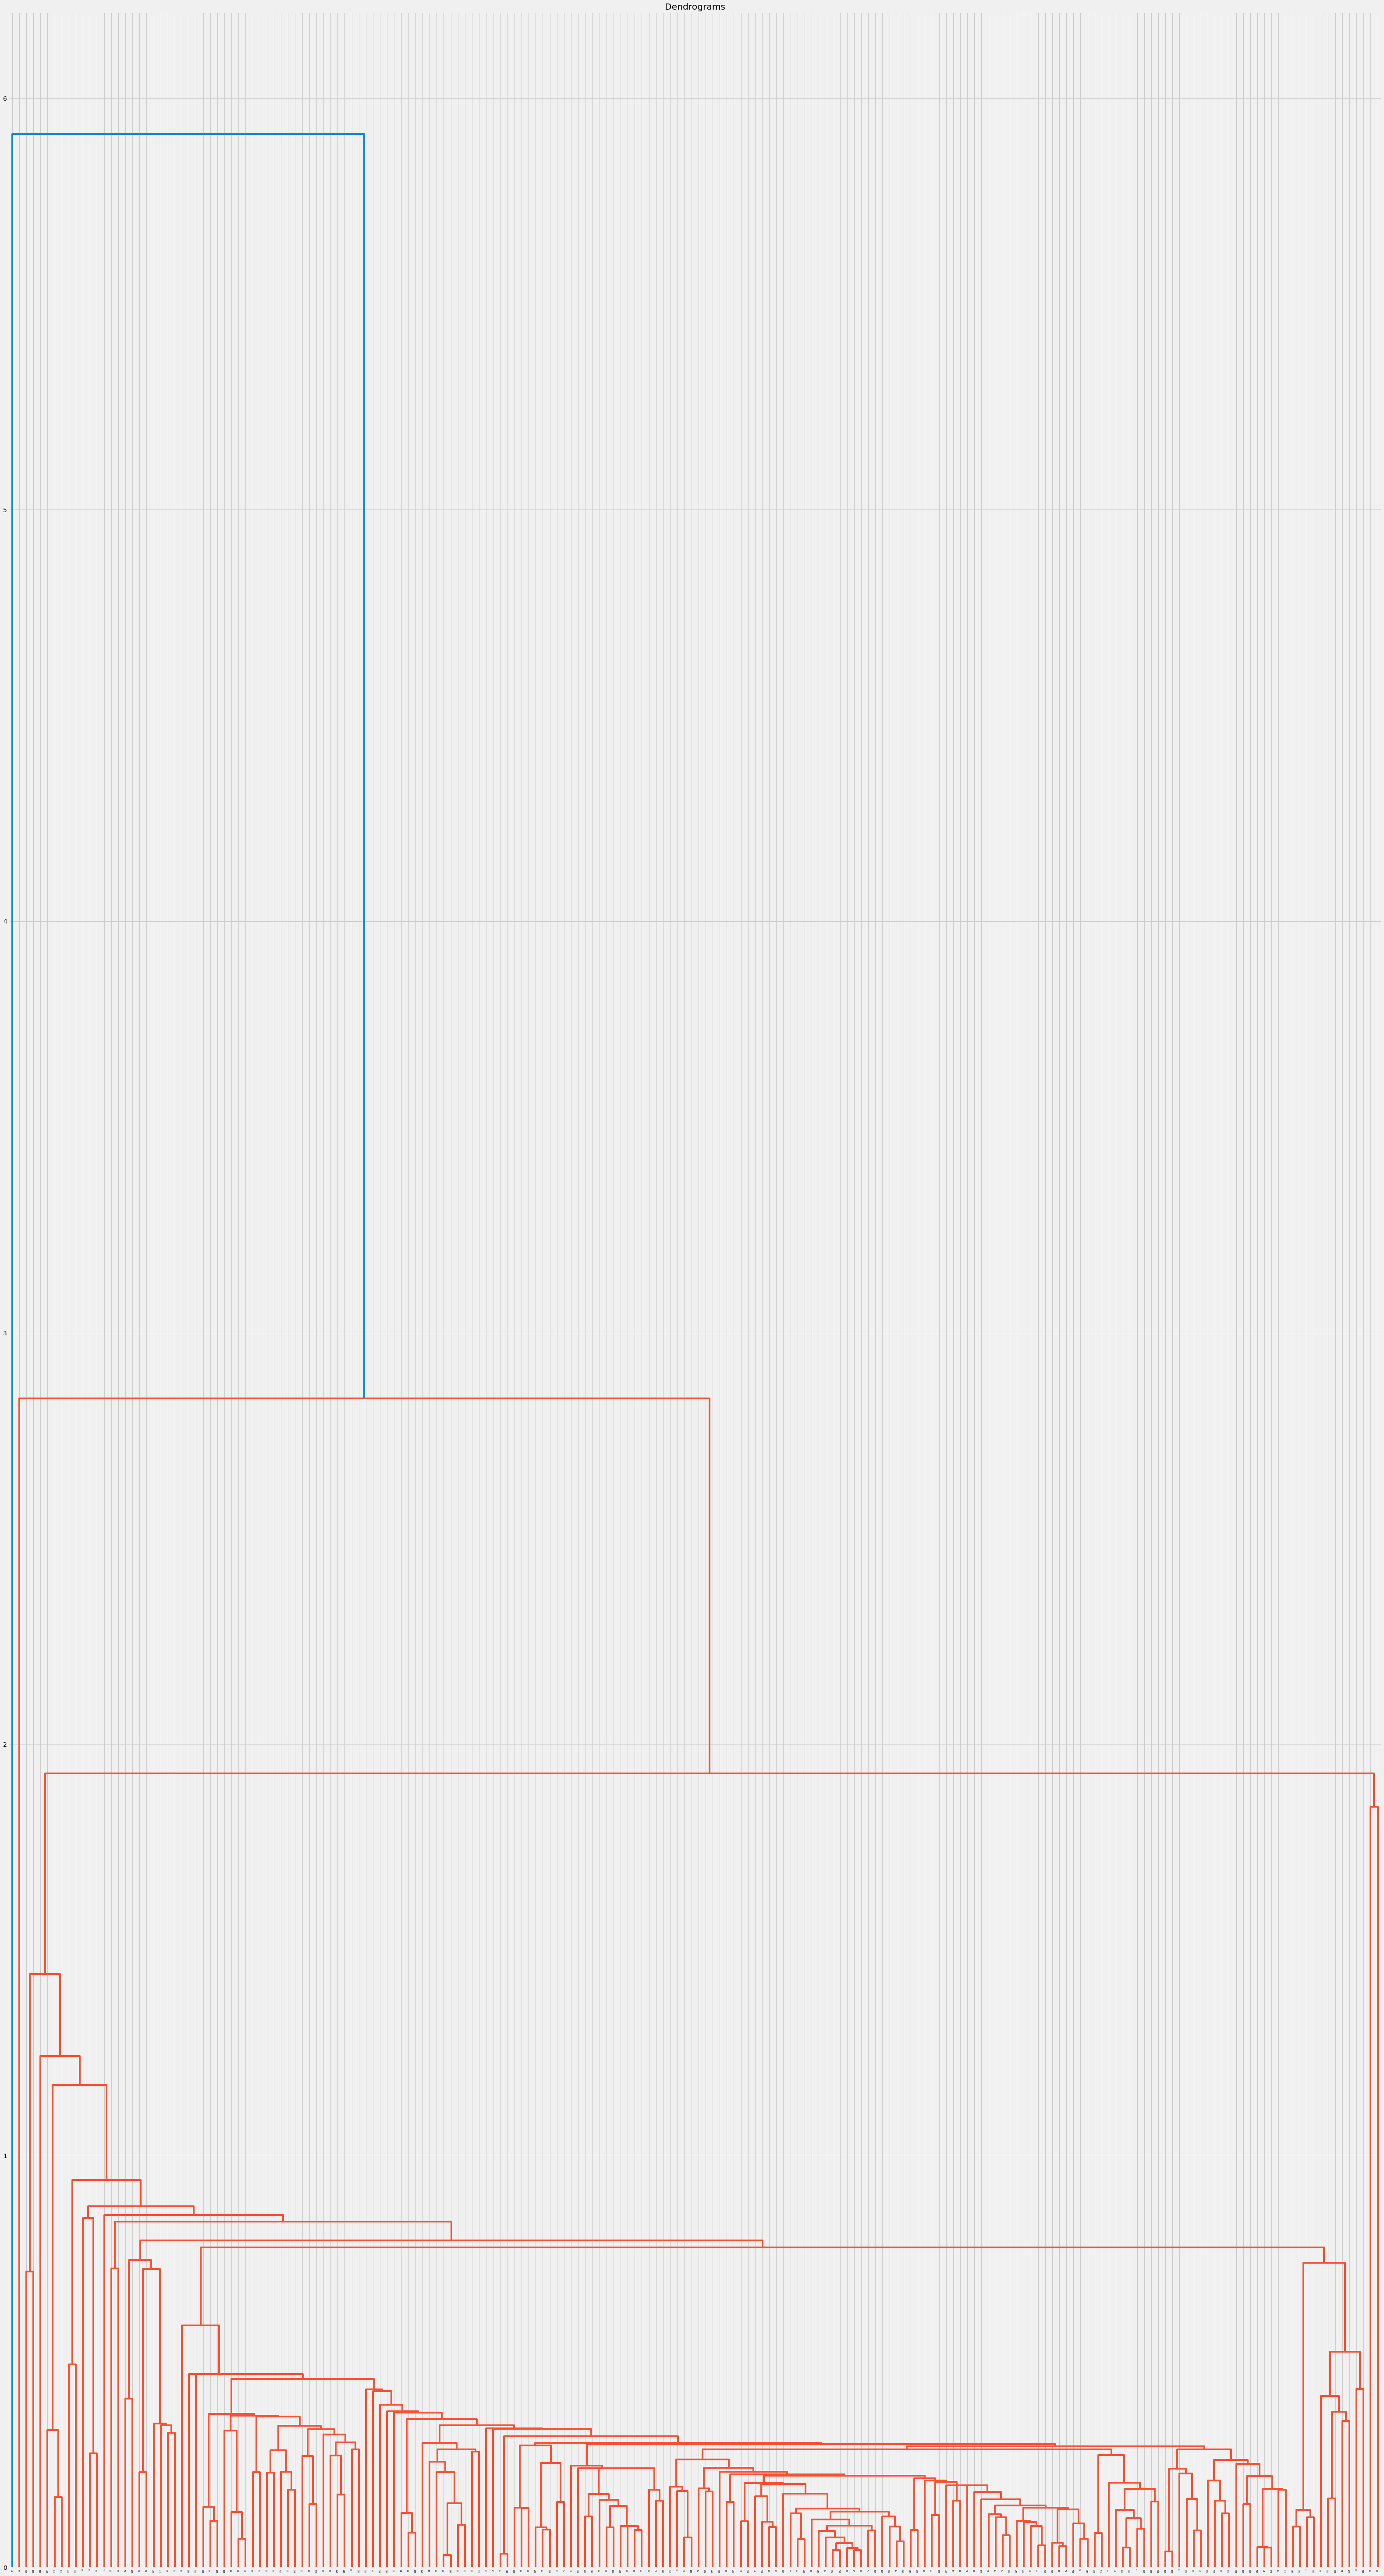

In [34]:
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
pca = PCA(n_components=2)
pca.fit(scaled_ds)
plt.figure(figsize=(50, 100))  
plt.title("Dendrograms")
#El sample(frac = 0.0001) fue puesto porque de lo contarrio arrojaba un error de que el dataframe era muy grande.
dend = shc.dendrogram(shc.linkage(PCA_ds.sample(frac = 0.0001), method='single'))

La distancia mas larga del eje Y es para cuando Y es igual a 2, donde hay 3 lineas. Por lo que 3 serán la cantidad de clusters.

In [36]:
silhouette_coefficients = []

for k in range(2, 7):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  
    cluster.fit(PCA_ds.sample(frac = 0.0001))
    score = silhouette_score(PCA_ds.sample(frac = 0.0001), cluster.labels_, sample_size=100)
    silhouette_coefficients.append(score)

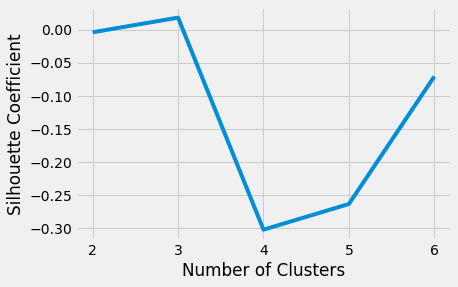

In [37]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Para una cantidad de clusters de 3, el coeficiente tiene su máximo, pero es un valor muy bajo.